# Business Intelligence by Geomapping

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [13]:
df = pd.read_csv("main_df.csv",low_memory=False)

Filter observations with geocodes and groupby type.

In [16]:
add = df[df.lat.notna() & df.long.notna()]
add = add[add.acn != 2512]

In [18]:
acn_with_add = list(with_add.acn.unique())
add = add[add.acn.isin(acn_with_add)]

In [19]:
add.head()

,acn,trans_id,timestamp,item,item_group,total,membership,group,city,state,zipcode,lat,long,category
83477,1303,36628,2015-07-31 00:00:00,Membership for &quot;General Family Membership...,Membership Dues,140.73,General Family Membership,General Family Membership,NEW BRAUNFELS,TX,78132.0,29.714595,-98.285693,Admin
83478,1303,37385,2015-08-06 20:42:00,$2.00 Ice Cream,Food & Consumables,2.00,General Family Membership,General Family Membership,NEW BRAUNFELS,TX,78132.0,29.714595,-98.285693,Bar
83479,1303,37397,2015-08-06 21:02:00,Michelob Ultra Bottle,Beer,2.75,General Family Membership,General Family Membership,NEW BRAUNFELS,TX,78132.0,29.714595,-98.285693,Bar
83480,1303,37395,2015-08-06 20:48:00,Child's Dinner,Dinners,5.41,General Family Membership,General Family Membership,NEW BRAUNFELS,TX,78132.0,29.714595,-98.285693,Event
83481,1303,31908,2015-06-30 00:00:00,Membership for &quot;General Family Membership...,Membership Dues,140.73,General Family Membership,General Family Membership,NEW BRAUNFELS,TX,78132.0,29.714595,-98.285693,Admin


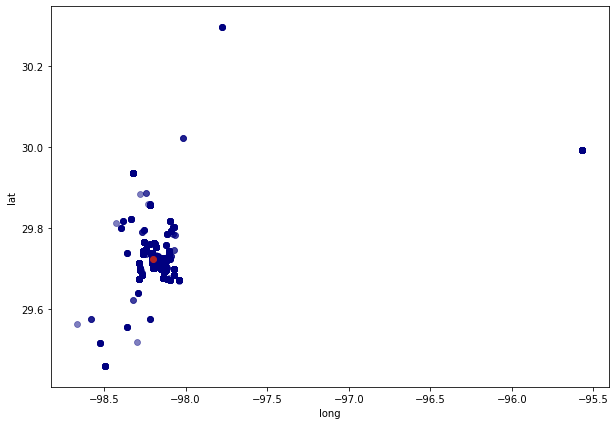

In [53]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="long",y="lat",data=add[(add.lat>29.95) | (add.long < (98*-1))],color="navy",edgecolor=None,alpha=.5)
plt.scatter(y=29.723358,x=-98.1981613,color="firebrick") #jncc

In [23]:
geo = gpd.GeoDataFrame(add, geometry=gpd.points_from_xy(add.long, add.lat))

In [24]:
geo.head()

,acn,trans_id,timestamp,item,item_group,total,membership,group,city,state,zipcode,lat,long,category,geometry
83477,1303,36628,2015-07-31 00:00:00,Membership for &quot;General Family Membership...,Membership Dues,140.73,General Family Membership,General Family Membership,NEW BRAUNFELS,TX,78132.0,29.714595,-98.285693,Admin,POINT (-98.28569 29.71459)
83478,1303,37385,2015-08-06 20:42:00,$2.00 Ice Cream,Food & Consumables,2.00,General Family Membership,General Family Membership,NEW BRAUNFELS,TX,78132.0,29.714595,-98.285693,Bar,POINT (-98.28569 29.71459)
83479,1303,37397,2015-08-06 21:02:00,Michelob Ultra Bottle,Beer,2.75,General Family Membership,General Family Membership,NEW BRAUNFELS,TX,78132.0,29.714595,-98.285693,Bar,POINT (-98.28569 29.71459)
83480,1303,37395,2015-08-06 20:48:00,Child's Dinner,Dinners,5.41,General Family Membership,General Family Membership,NEW BRAUNFELS,TX,78132.0,29.714595,-98.285693,Event,POINT (-98.28569 29.71459)
83481,1303,31908,2015-06-30 00:00:00,Membership for &quot;General Family Membership...,Membership Dues,140.73,General Family Membership,General Family Membership,NEW BRAUNFELS,TX,78132.0,29.714595,-98.285693,Admin,POINT (-98.28569 29.71459)


In [41]:
nb = gpd.read_file("Building_Footprints_New_Braunfels_ETJ_and_City_Area.shp")

In [42]:
nb.head()

,OBJECTID_1,BldName,FEATURECOD,ShapeSTAre,ShapeSTLen,GlobalID_1,ShapeSTA_1,ShapeSTL_1,geometry
0,1,None,Commercial or Retail Facility,273486.337891,5494.088845,{D3E665AA-CA45-4A45-91D8-D1930F4999E1},273486.349609,5494.088845,"POLYGON ((2253907.164 13802650.182, 2253983.66..."
1,2,None,Commercial or Retail Facility,16798.429688,626.354876,{C6B56021-809D-4397-A7C2-97B077559519},16798.433594,626.354876,"POLYGON ((2250118.924 13799337.357, 2250359.08..."
2,3,None,Commercial or Retail Facility,167532.792969,3098.610751,{B9D85A22-CBCD-44D0-9787-DC54FB82143D},167532.791016,3098.610751,"POLYGON ((2251392.096 13799192.897, 2251249.62..."
3,4,None,Commercial or Retail Facility,4433.570312,267.289757,{F6A6C7B0-6C6D-4318-9A44-01995A854A8E},4433.572266,267.289757,"POLYGON ((2250311.768 13799504.880, 2250372.02..."
4,5,None,Commercial or Retail Facility,3187.648438,250.689766,{295271B5-E456-4D0F-9CC2-E49F0184AF5E},3187.652344,250.689766,"POLYGON ((2250631.535 13799516.335, 2250635.59..."


<Figure size 720x504 with 0 Axes>

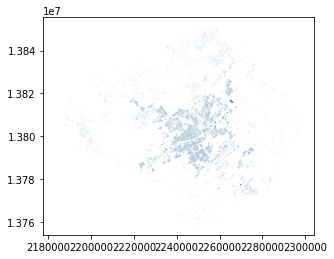

In [45]:
plt.figure(figsize=(10,7))
nb.geometry.plot()

plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


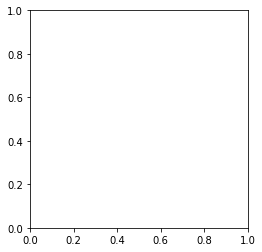

In [39]:
ax = texas[texas["HQ"] == "New Braunfels"].plot()

In [ ]:
# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()